In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.style.use("seaborn")

## Data PreParation and Visulization

In [17]:
mean_01=[1,1]
cov_01=[[3,0.3],[0.3,2]]

mean_02=[6,2]
cov_02=[[2.5,-0.4],[-0.4,3]]

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


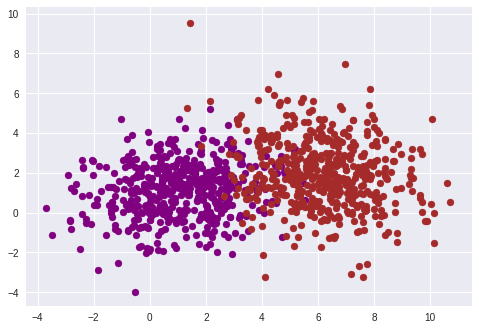

In [18]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],color="purple")
plt.scatter(dist_02[:,0],dist_02[:,1],color="brown")
plt.show()

In [25]:
dataset=np.zeros((dist_01.shape[0]+dist_02.shape[0],dist_01.shape[1]+1))
dataset[:dist_01.shape[0],:-1]=dist_01
dataset[dist_01.shape[0]:,:-1]=dist_02
dataset[dist_01.shape[0]:,-1:]=1
print(dataset.shape)
dataset[:3]

(1000, 3)


array([[2.90853179, 3.2085175 , 0.        ],
       [1.86780608, 4.13147227, 0.        ],
       [1.60868163, 1.51846711, 0.        ]])

In [26]:
np.random.shuffle(dataset)

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset[:,:-1],dataset[:,-1])
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(750, 2) (750,) (250, 2) (250,)


## Implementation Logistic Regression 

In [224]:
class LogisticRegression:
    def __init__(self,x,y):
        self.X=x
        self.Y=y
        self.coef=np.random.uniform(low=-1,high=1,size=(x.shape[1],))
        self.bias=np.random.random()
    
    def sigmoid(y):
        return 1.0/(1.0+np.exp(-y))
    
    def hypothesis(self,x):
        return LogisticRegression.sigmoid(self.coef.dot(x)+self.bias)
    
    def Predict(self,x):
        y_cap=self.hypothesis(x)
        if y_cap < 0.5:
            return 0
        else: 
            return 1
    
    def Compute_Loss(self):
        loss=0
#         print(self.X.shape,self.Y)
        for x,y in zip(self.X,self.Y):
            y_cap=self.hypothesis(x)
            prob_loss=(y*np.log(y_cap+1e-03))+(1-y)*(np.log(1-y_cap+1e-03))
            loss+=prob_loss
            
        return np.array(-loss)
    
    def accuracy(self,test,true_lables):
        pred=[]
        for x in test:
            pred.append(self.Predict(x))
        pred=np.array(pred)
        #print(test.shape,true_lables.shape,pred.shape)
#         print((pred==true_lables).sum())
        return (pred==true_lables).sum()/pred.shape[0]
    
    def Calculate_Gradient(self,alpha=0.01):
        grad_0=0
        theta=np.zeros_like(self.coef)
        
        for xi ,yi in zip(self.X,self.Y):
            theta+=(self.hypothesis(xi)-yi)*xi
            grad_0+=(self.hypothesis(xi)-yi)
            
        #Update Weight
        self.coef-=alpha*theta
        self.bias-=alpha*grad_0
        
    def train(self,losses,iteration=1,alpha=0.1):
        for _ in range(iteration):
            self.Calculate_Gradient(alpha)
            losses.append(self.Compute_Loss())
            
        return losses

## Training Our Model

In [240]:
LRC=LogisticRegression(x_train,y_train)

In [245]:
loss=[LRC.Compute_Loss()]
loss

[array(242.97385174)]

In [252]:
losses=LRC.train(loss,20,0.01)

In [253]:
losses

[array(242.97385174),
 array(179.13533253),
 array(193.19332636),
 array(733.06504286),
 array(1687.6431031),
 array(1071.05983638),
 array(227.44483335),
 array(204.84134049),
 array(311.41117568),
 array(779.82065429),
 array(543.11042696),
 array(1294.4631115),
 array(287.73319012),
 array(427.7189956),
 array(942.4317709),
 array(174.0758407),
 array(185.23324869),
 array(261.87676226),
 array(511.93826699),
 array(450.26969433),
 array(1004.11851477),
 array(158.06081725),
 array(157.84808868),
 array(156.75018688),
 array(177.88568023),
 array(223.281132),
 array(337.05984823),
 array(710.20623083),
 array(235.3640569),
 array(367.8489684),
 array(372.96831066)]

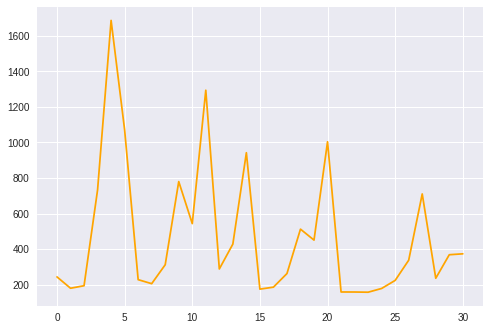

In [254]:
plt.plot(losses,color="orange")

In [255]:
LRC.accuracy(x_test,y_test)
# y_test[5:7]

0.816

In [256]:
def draw_decision_boundary(Creg):
    plt.figure()
    plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
    plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
    
    x = np.array([-4,5])
    y = -(Creg.coef[0] * x + Creg.bias)/Creg.coef[1]
    print(y)
    print("theta[1,2]: ", Creg.coef, 'theta0: ', Creg.bias)
    
    plt.plot(x,y, 'purple')
    plt.title("Hyper plane")
    plt.show()

[281.91854576  11.43443846]
theta[1,2]:  [3.294158   0.10960874] theta0:  -17.724104390016464


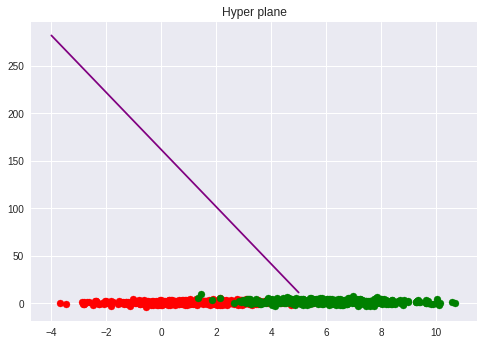

In [257]:
draw_decision_boundary(LRC)

In [258]:
LRC.coef,LRC.bias

(array([3.294158  , 0.10960874]), -17.724104390016464)

### SKlearn Implementaitaon

In [167]:
from sklearn.linear_model import LogisticRegression as skLRC

In [168]:
Lrc=skLRC()

In [169]:
Lrc.fit(x_train,y_train)

/home/puneet/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
Lrc.score(x_test,y_test)

0.944